Shape of X : (46935, 28, 28, 3)


C:\Users\nrzpr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3077 - loss: 1.7471 - val_accuracy: 0.5316 - val_loss: 1.2762 - learning_rate: 1.0000e-04
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5417 - loss: 1.2213 - val_accuracy: 0.6145 - val_loss: 1.0489 - learning_rate: 1.0000e-04
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6142 - loss: 1.0365 - val_accuracy: 0.6602 - val_loss: 0.9307 - learning_rate: 1.0000e-04
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6688 - loss: 0.9178 - val_accuracy: 0.6927 - val_loss: 0.8505 - learning_rate: 1.0000e-04
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7097 - loss: 0.8227 - val_accuracy: 0.7232 - val_loss: 0.7905 - learning_rate: 1.0000e-04
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7450 - loss: 0.7407 - val_accuracy: 0.7273 - val_loss: 0.7604 - learning_rate: 1.0000e-04
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc

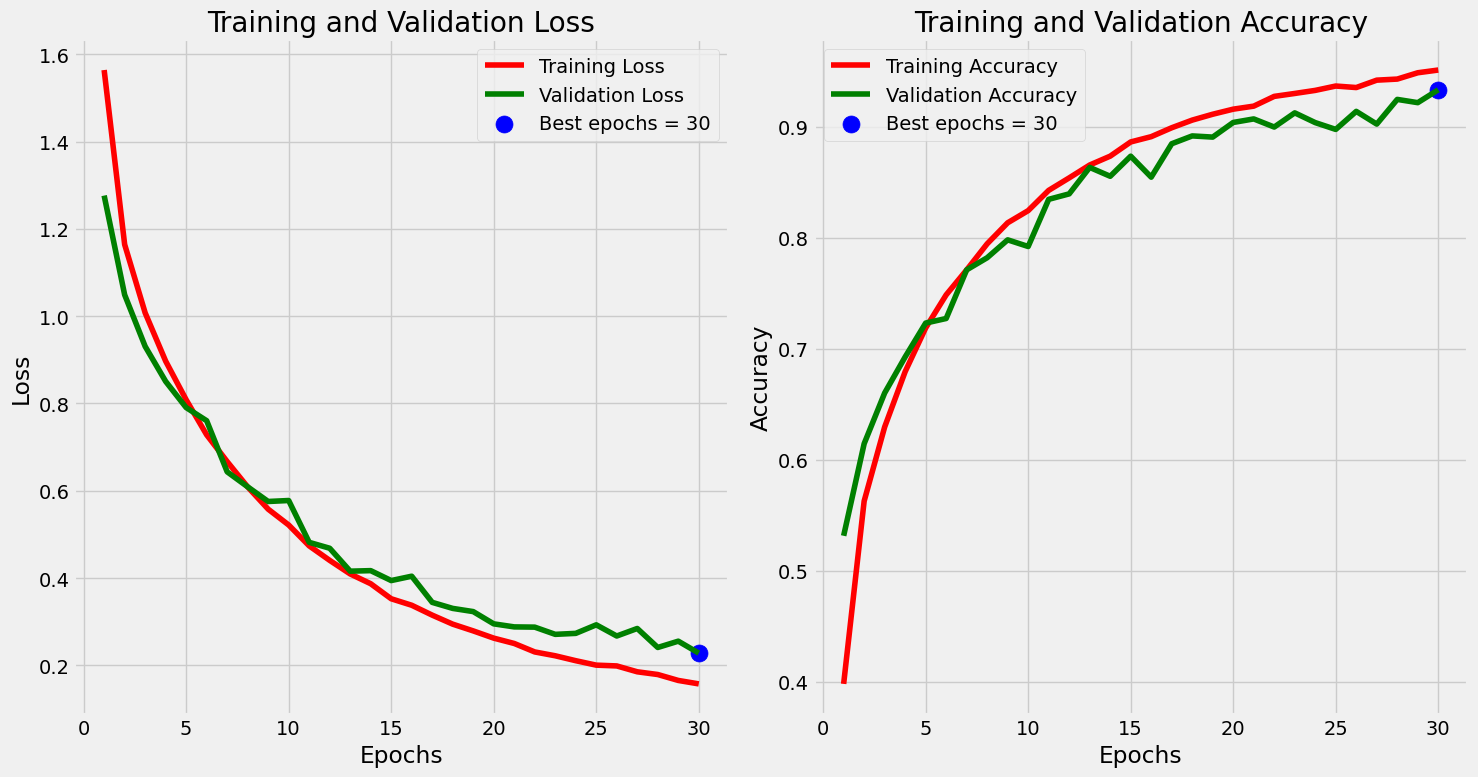

294/294 - 1s - 2ms/step - accuracy: 0.9285 - loss: 0.2279
Test Accuracy: 0.9285
Test Loss: 0.2279
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
               precision    recall  f1-score      support
0              0.986212  1.000000  0.993058  1359.000000
1              0.966887  0.996965  0.981696  1318.000000
2              0.817869  0.942948  0.875966  1262.000000
3              0.986131  1.000000  0.993017  1351.000000
4              0.877660  0.720524  0.791367  1374.000000
5              0.991241  1.000000  0.995601  1358.000000
6              0.869631  0.845421  0.857355  1365.000000
accuracy       0.928518  0.928518  0.928518     0.928518
macro avg      0.927947  0.929408  0.926866  9387.000000
weighted avg   0.928741  0.928518  0.926828  9387.000000
Confusion Matrix:
       0     1     2     3    4     5     6
0  1359     0     0     0    0     0     0
1     2  1314     2     0    0     0     0
2     2     9  1190     2   33     0    26
3     0     0     0

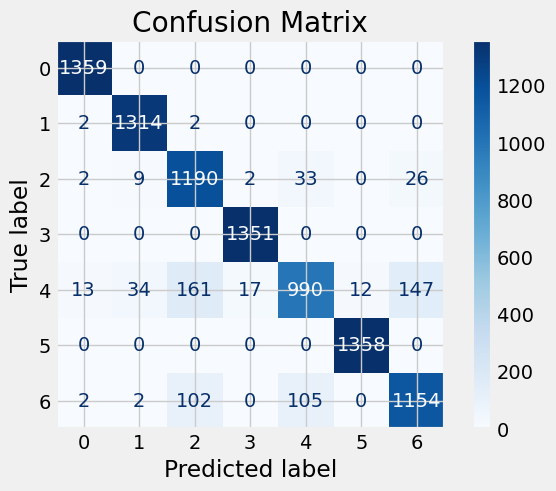

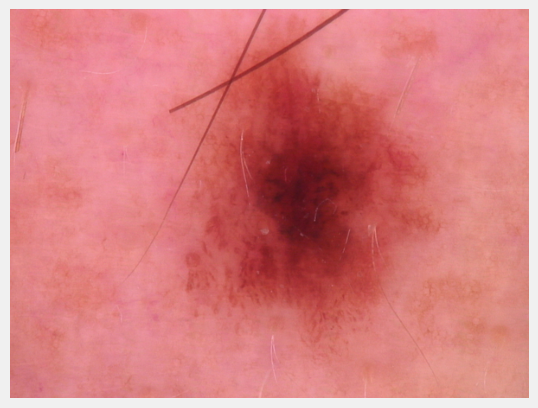

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
nv


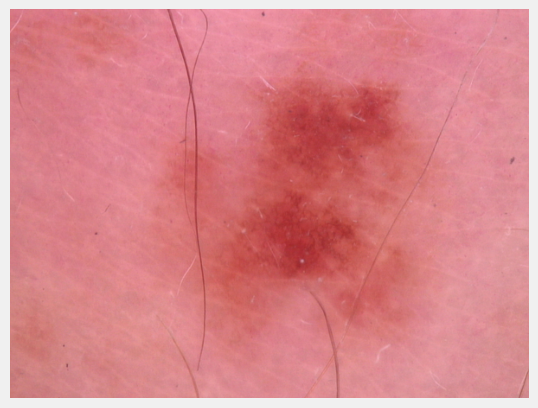

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
nv


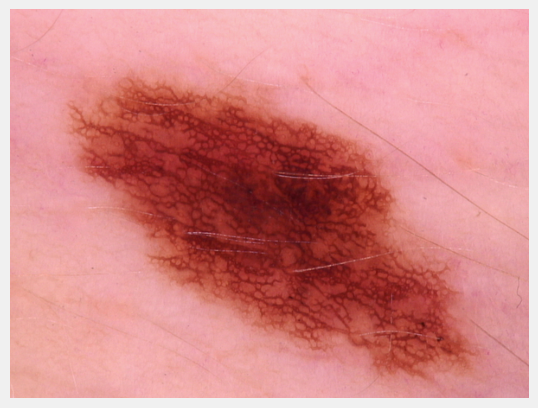

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
nv


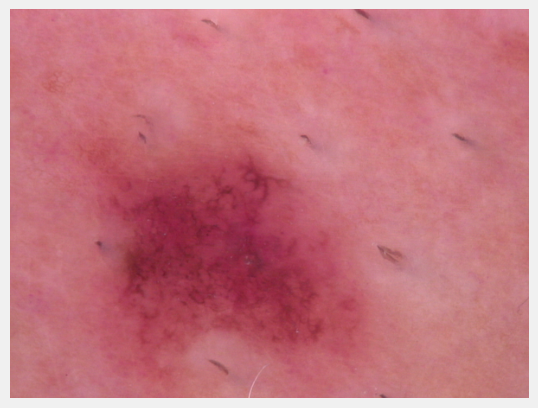

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
nv


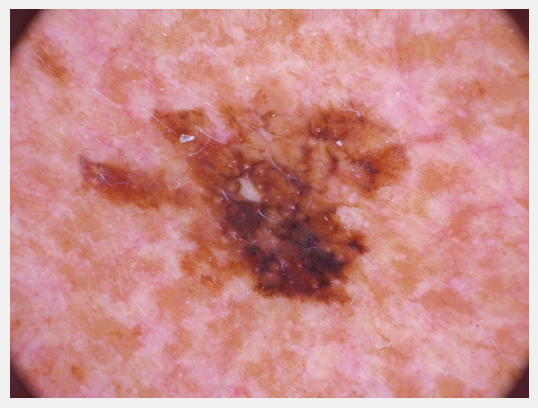

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
nv


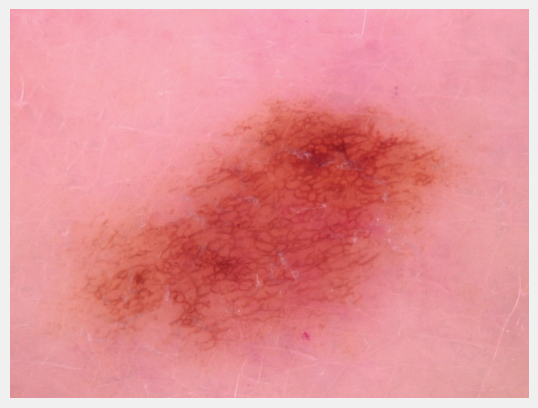

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
nv


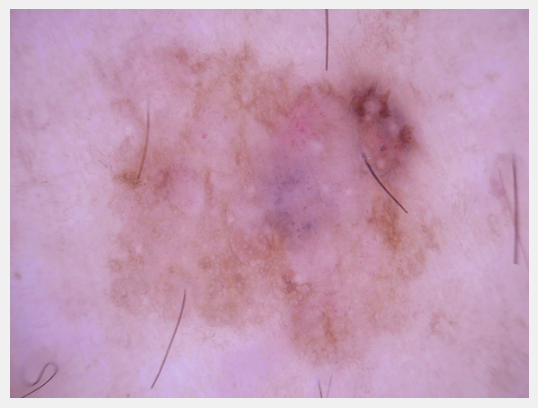

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
nv


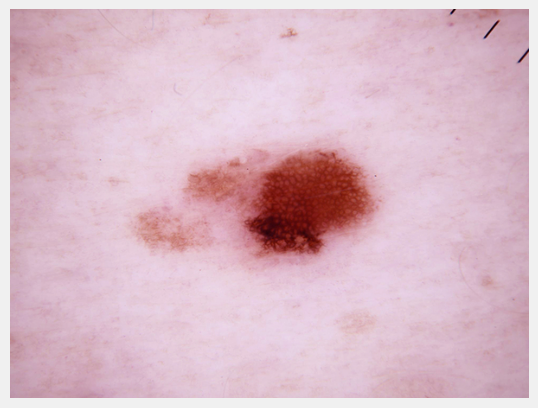

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
nv


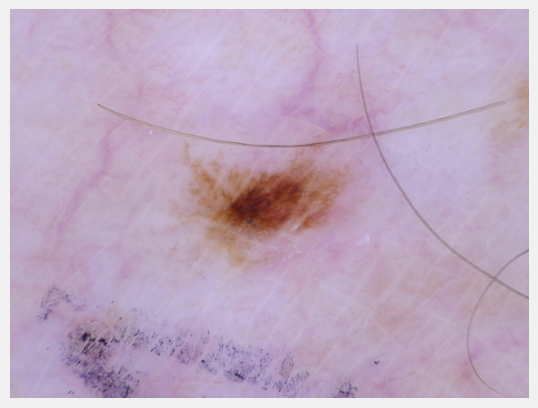

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
nv


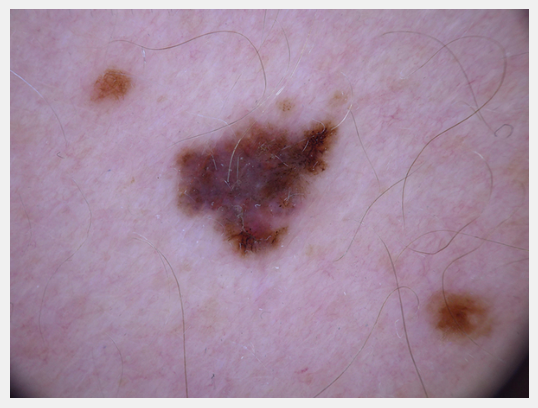

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
nv


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import cv2

# Ensure data path is correct
data_path = r'D:\Coventry University\Master\Second semester\Artificial Neural Networks\HAM10000_metadata.csv'
df = pd.read_csv(data_path)

# Define image directories
image_dir_part_1 = r'D:\Coventry University\Master\Second semester\Artificial Neural Networks\HAM10000_images_part_1'
image_dir_part_2 = r'D:\Coventry University\Master\Second semester\Artificial Neural Networks\HAM10000_images_part_2'

# Function to map image IDs to file paths correctly
def map_image_path(image_id):
    image_file = image_id + ".jpg"
    if os.path.exists(os.path.join(image_dir_part_1, image_file)):
        return os.path.join(image_dir_part_1, image_file)
    elif os.path.exists(os.path.join(image_dir_part_2, image_file)):
        return os.path.join(image_dir_part_2, image_file)
    else:
        return None

# Apply the function to create the correct image paths
df["image_path"] = df["image_id"].apply(map_image_path)

# Verify the existence of image paths with full path
valid_paths = df["image_path"].apply(lambda x: x is not None and os.path.exists(x))
df = df[valid_paths]

# Data oversampling
data = pd.read_csv(r'D:\Coventry University\Master\Second semester\Artificial Neural Networks\hmnist_28_28_RGB.csv')
y = data['label']
x = data.drop(columns=['label'])

oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

# Reset the index of y to match the new index of x
y = y.reset_index(drop=True)

x = np.array(x).reshape(-1, 28, 28, 3)
print('Shape of X :', x.shape)

x = (x - np.mean(x)) / np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Model Architecture with regularization and batch normalization
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(df['dx'].unique()), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Train the model with more epochs and validation data
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=30,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Plotting training and validation accuracy and loss
def plot_training_history(history):
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']

    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    index_acc = np.argmax(val_acc)
    val_highest = val_acc[index_acc]

    Epochs = [i + 1 for i in range(len(train_acc))]

    loss_label = f'Best epochs = {str(index_loss + 1)}'
    acc_label = f'Best epochs = {str(index_acc + 1)}'

    plt.figure(figsize=(15, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, train_loss, 'r', label='Training Loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

# Classification report and confusion matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate classification report
classification_report_dict = classification_report(Y_test, Y_pred_classes, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()
classification_report_df.to_csv('classification_report.csv', index=True)

# Generate confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(Y_test, Y_pred_classes))
confusion_matrix_df.to_csv('confusion_matrix.csv', index=False)

print("Classification Report:\n", classification_report_df)
print("Confusion Matrix:\n", confusion_matrix_df)

# Confusion Matrix Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred_classes), display_labels=[0, 1, 2, 3, 4, 5, 6])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display some predictions
def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def display_predictions(model, srcdir, classes, num_samples=10):
    count = 0
    for temp in os.listdir(srcdir):
        file_path = os.path.join(srcdir, temp)

        if not os.path.isfile(file_path):
            continue  # Skip non-file entries

        try:
            img = cv2.imread(file_path)
            if img is None:
                continue

            show_image(img)

            img_resized = cv2.resize(img, (28, 28))
            result = model.predict(img_resized.reshape(1, 28, 28, 3))
            max_prob = max(result[0])
            class_ind = list(result[0]).index(max_prob)
            class_name = classes[class_ind]

            print(class_name)
            count += 1
            if count >= num_samples:
                break

        except Exception as e:
            print(f"Error processing file {temp}: {e}")

classes = {4: 'nv', 6: 'mel', 2: 'bkl', 1: 'bcc', 5: 'vasc', 0: 'akiec', 3: 'df'}
srcdir = r'D:\Coventry University\Master\Second semester\Artificial Neural Networks\HAM10000_images_part_1'
display_predictions(model, srcdir, classes)


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load your trained model
model = load_model('best_model.keras')

# Define the classes
classes = {4: 'nv', 6: 'mel', 2: 'bkl', 1: 'bcc', 5: 'vasc', 0: 'akiec', 3: 'df'}

# Function to preprocess the uploaded image
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = (image - np.mean(image)) / np.std(image)
    return image

# Function to predict the class of the uploaded image
def predict_image(image):
    processed_image = preprocess_image(image)
    result = model.predict(processed_image)
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    return class_name, max_prob

# Streamlit UI
st.title("Skin Lesion Classification")

# File uploader for image
uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Convert the file to an opencv image.
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)

    # Display the uploaded image
    st.image(image, channels="RGB")

    # Predict the class of the image
    class_name, confidence = predict_image(image)

    # Display the prediction
    st.write(f"Predicted Class: {class_name}")
    st.write(f"Confidence: {confidence:.2f}")

    # Show classification report and confusion matrix
    st.write("Classification Report:")
    report = pd.read_csv('classification_report.csv')
    st.dataframe(report)

    st.write("Confusion Matrix:")
    matrix = pd.read_csv('confusion_matrix.csv')
    st.dataframe(matrix)


Writing app.py
